In [1]:
import os,time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '/kaggle/input/playground-series-s3e5/'

train_pth = os.path.join(data_dir,'train.csv')
test_pth = os.path.join(data_dir,'test.csv')

wine_pth = '/kaggle/input/wine-quality-dataset/WineQT.csv'

In [3]:
train_data = pd.read_csv(train_pth)
print(train_data.columns)
print(train_data.shape)

Index(['Id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
(2056, 13)


In [4]:
wine_df = pd.read_csv(wine_pth)
print(wine_df.shape)
print(wine_df.columns)

(1143, 13)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [5]:
train_data.dtypes

Id                        int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
train_data.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [7]:
# train_data.isna().sum()
# no missing values

In [10]:
num_cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

cat_cols = []

target_col = 'quality'

In [11]:
train_data[target_col].value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

In [12]:
# wine_df[target_col].value_counts()

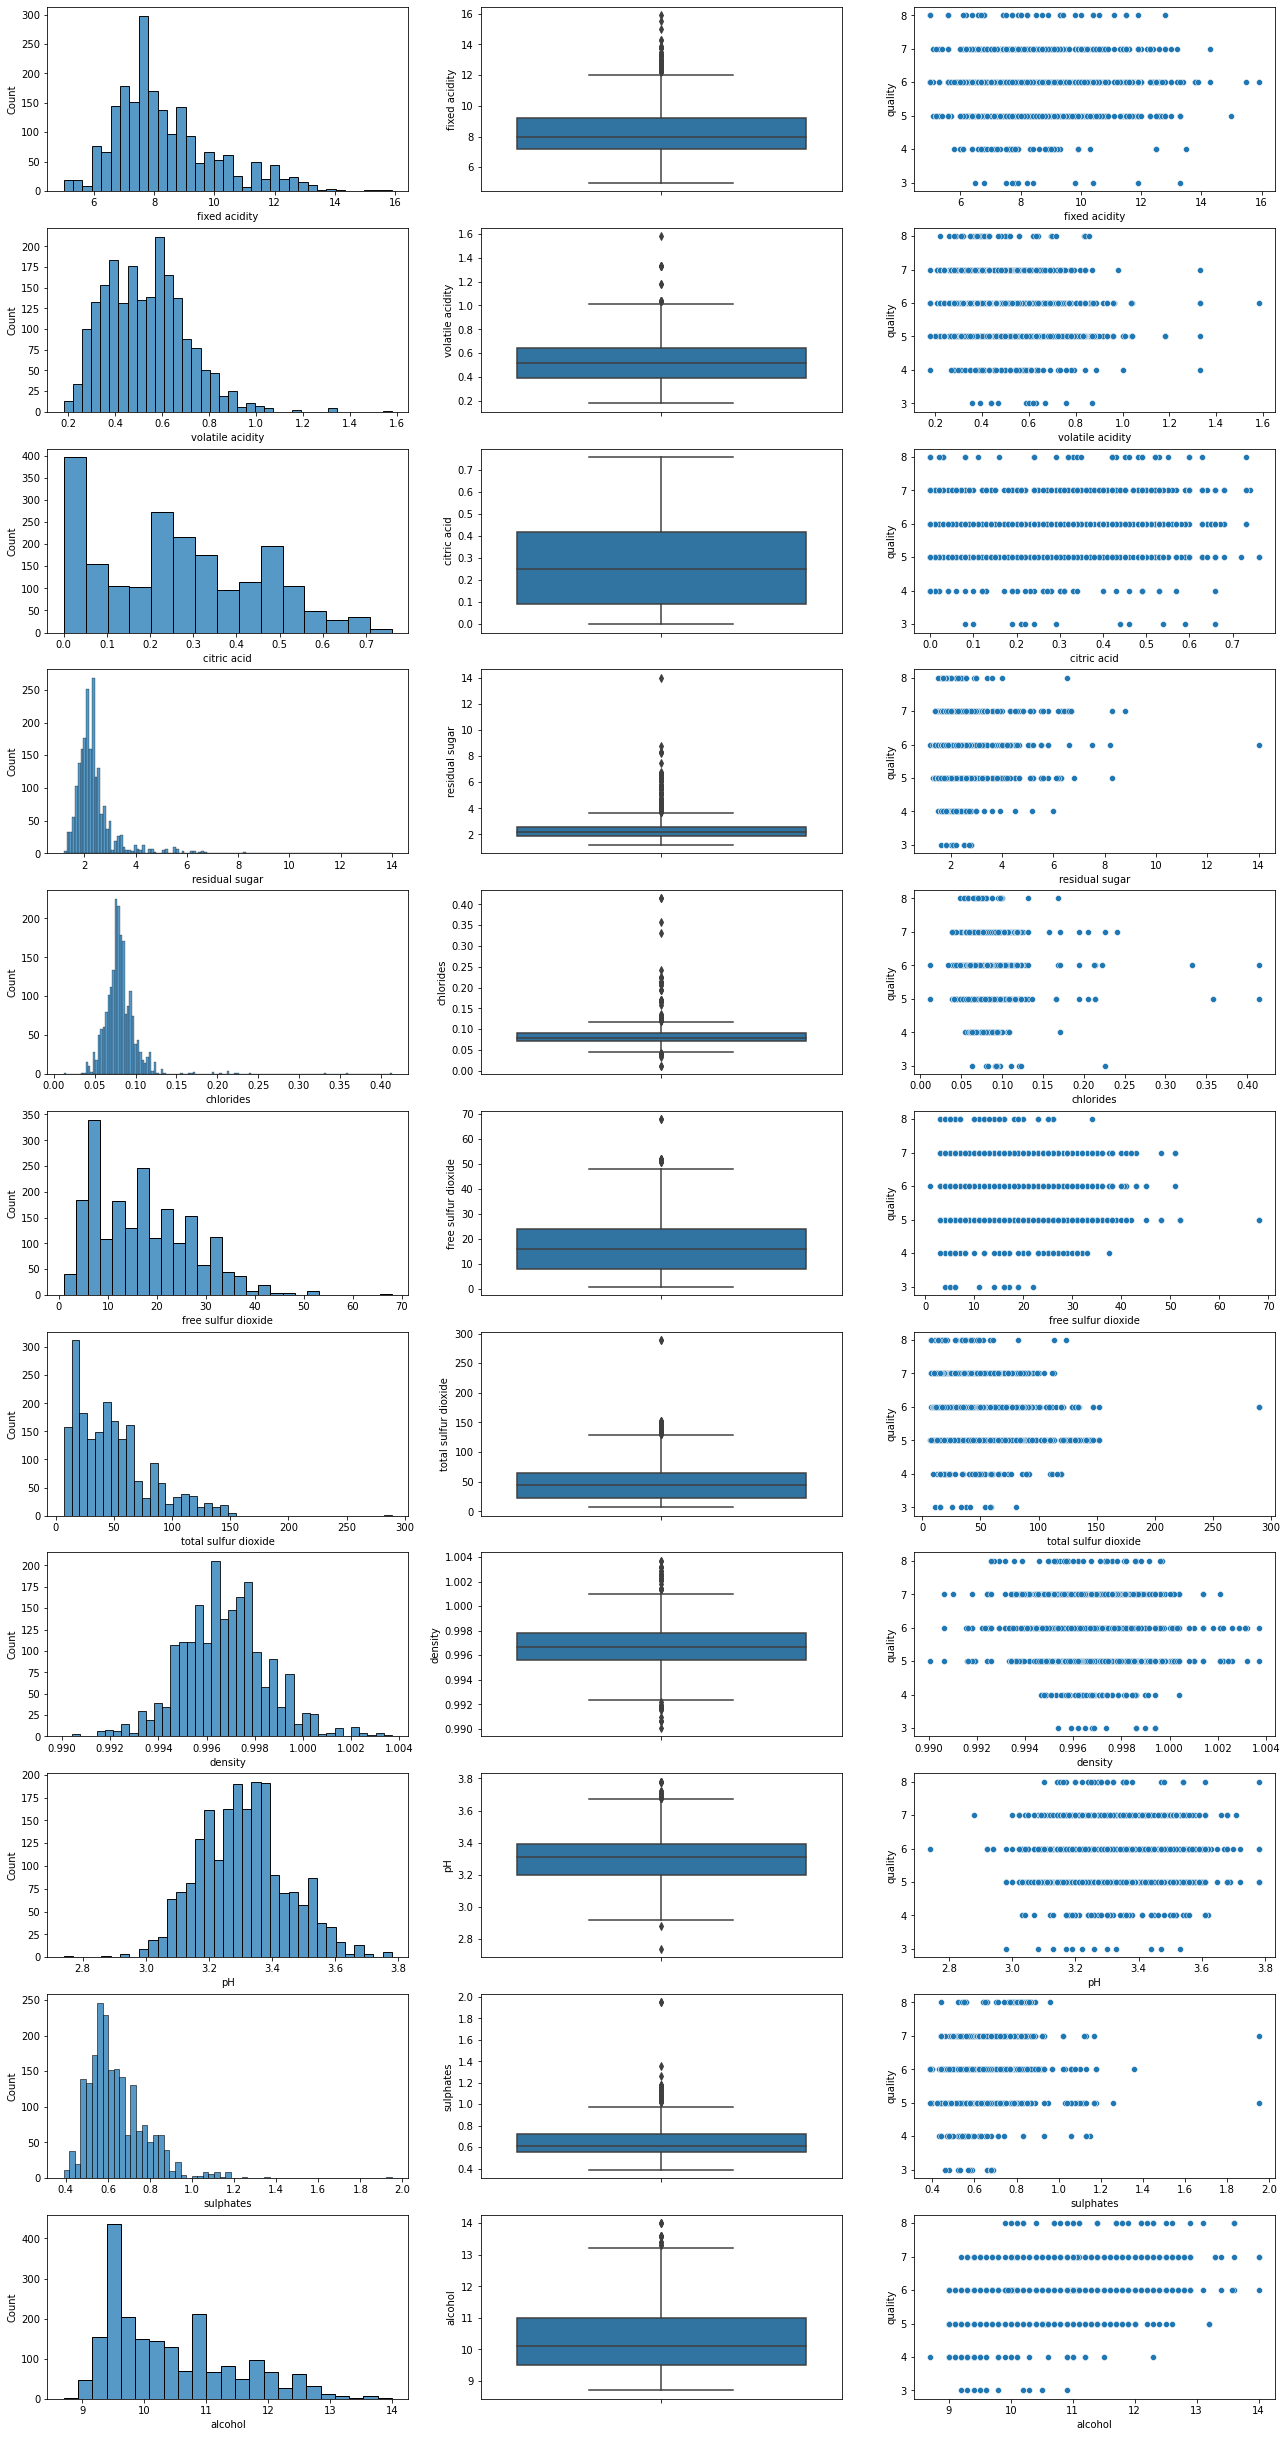

In [13]:
n = len(num_cols)
fig,axes = plt.subplots(n,3,figsize=(22,n*4))
for i in range(n):
    col = num_cols[i]
#     sns.histplot(data=train_data,x=col,hue=target_col,ax=axes[i][0])
#     sns.boxplot(data = train_data,x=target_col,y=col,ax=axes[i][1])
    sns.histplot(data=train_data,x=col,ax=axes[i][0])
    sns.boxplot(data = train_data,y=col,ax=axes[i][1])
    sns.scatterplot(data = train_data,x=col,y=target_col,ax=axes[i][2])

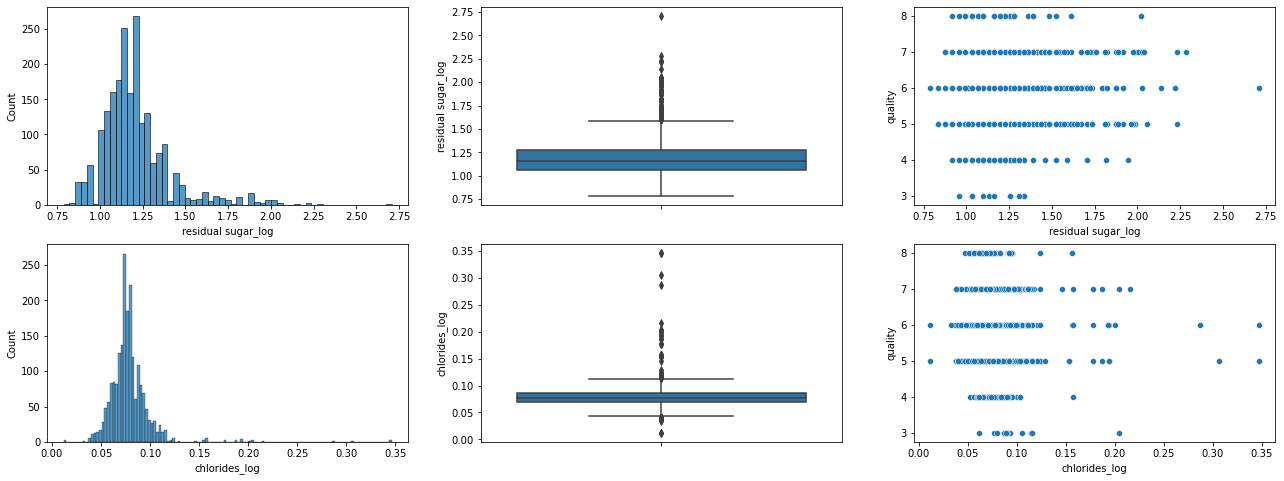

In [14]:
temp_cols = ['residual sugar', 'chlorides']
temp_df = train_data.copy(deep=True)
n = len(temp_cols)
fig,axes = plt.subplots(n,3,figsize=(22,n*4))
for i in range(n):
    col = temp_cols[i]
    col_log = f'{col}_log'
    temp_df[col_log] = temp_df[col].apply(lambda x : np.log(x+1))
#     sns.histplot(data=train_data,x=col,hue=target_col,ax=axes[i][0])
#     sns.boxplot(data = train_data,x=target_col,y=col,ax=axes[i][1])
    sns.histplot(data=temp_df,x=col_log,ax=axes[i][0])
    sns.boxplot(data = temp_df,y=col_log,ax=axes[i][1])
    sns.scatterplot(data = temp_df,x=col_log,y=target_col,ax=axes[i][2])

In [15]:
### is the quality increasing with increase in alcohol content??
### chlorides and residual_sugar have a lot of outliers

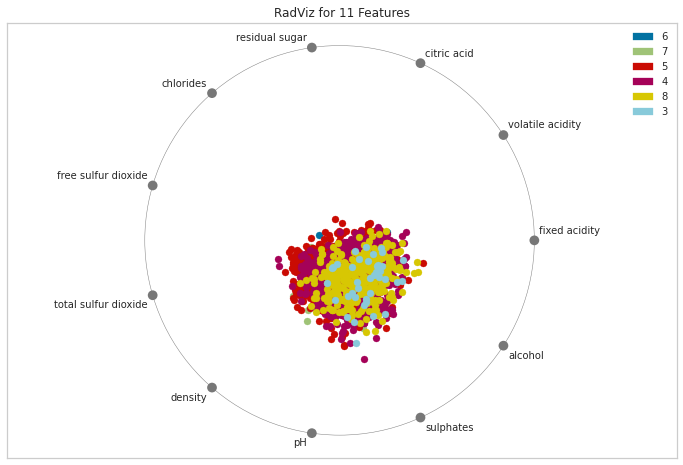

<AxesSubplot:title={'center':'RadViz for 11 Features'}>

In [16]:
## RadViz plot , more explain at : https://orange3.readthedocs.io/projects/orange-visual-programming/en/latest/widgets/visualize/radviz.html
## yellowbrick documnetation : https://www.scikit-yb.org/en/latest/api/features/radviz.html

from yellowbrick.features import RadViz

X = train_data[num_cols]
y = train_data[target_col]

classes = list(y.unique())

fig = plt.figure(figsize=(12,8))
vizer = RadViz(classes=classes)
vizer.fit(X,y)
vizer.transform(X)
vizer.show()

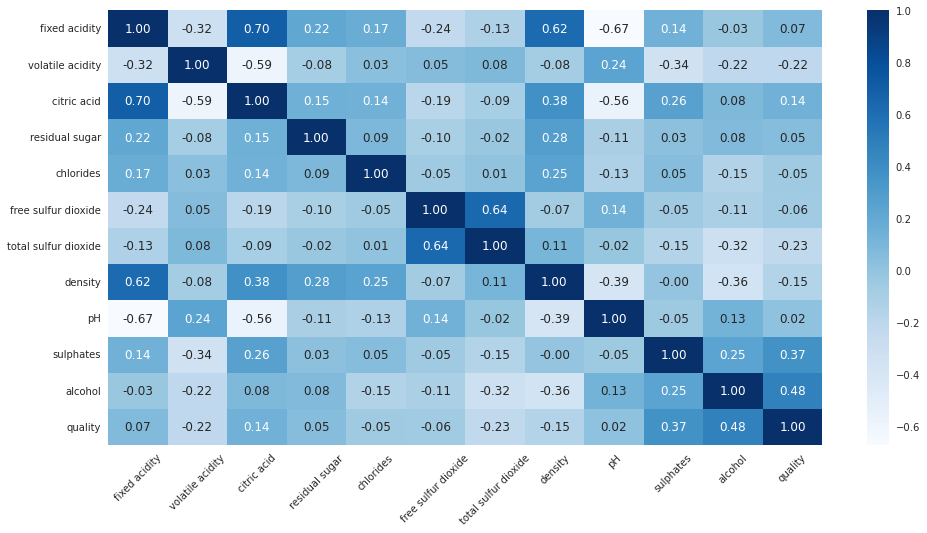

In [17]:
corr = train_data[num_cols + [target_col]].corr()
fig = plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='Blues')
plt.xticks(rotation=45);

In [18]:
## high +ve correlation between citric_acid - fixed_acidity , density - fixed_acidity 
## high -ve correlation between ph - fixed_acidity, ph - citric_acid 

In [19]:
!pip install lazypredict

In [20]:
from lazypredict.Supervised import LazyClassifier,LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC,SVR

from sklearn.metrics import confusion_matrix,cohen_kappa_score

In [21]:
num_cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [22]:
### without data from wine dataset
# X,y = train_data[num_cols].values,train_data[target_col].values

### using data from wine dataset
X = pd.concat([train_data[num_cols],wine_df[num_cols]],ignore_index=True,axis=0).values
y = pd.concat([train_data[target_col],wine_df[target_col]],ignore_index=True,axis=0).values


print(X.shape,y.shape)

(3199, 11) (3199,)


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(2559, 11) (2559,)
(640, 11) (640,)


In [47]:
def plot_confusion_matrix(y_test,preds,labels):
    mat = confusion_matrix(y_test,preds,labels = labels)
    mat_df = pd.DataFrame(mat,index=labels,columns=labels)
    _ = plt.figure(figsize=(16,12))
    sns.heatmap(mat_df,annot=True,fmt='.2f',cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
def plot_preds_dist(y_test,preds):
    _ = plt.figure(figsize = (6,4))
    sns.kdeplot(y_test,fill=True,label='Actual')
    sns.kdeplot(preds,fill=False,label='Predicted')
    plt.legend()

In [ ]:
## LightGBM model

lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train_scaled,y_train)
preds = lgbm_model.predict(X_test_scaled)
print(accuracy_score(y_test,preds))
plot_confusion_matrix(y_test,preds,labels = list(range(0,11)))

#### LGBM Public score : 0.556

In [ ]:
## Random Forest model

rf_model = RandomForestClassifier(max_depth = 10,n_estimators=100)
rf_model.fit(X_train_scaled,y_train)
preds = rf_model.predict(X_test_scaled)
print(accuracy_score(y_test,preds))
plot_confusion_matrix(y_test,preds,labels = list(range(0,11)))


#### Random Forest Model Public Score : 0.511

In [52]:
def reg_qdk(y_test,preds):
    preds = np.round(preds)
    return cohen_kappa_score(y_test,preds,labels=np.linspace(0,10,11),weights='quadratic')

0.5206351584151001


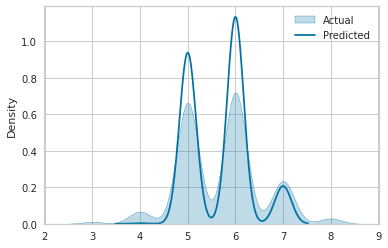

In [48]:
rf_model = RandomForestRegressor(max_depth = 10,n_estimators=100)
rf_model.fit(X_train_scaled,y_train)
preds = rf_model.predict(X_test_scaled)
preds_r = np.round(preds)
print(reg_qdk(y_test,preds_r))
plot_preds_dist(y_test,preds_r)

0.5391074430431073


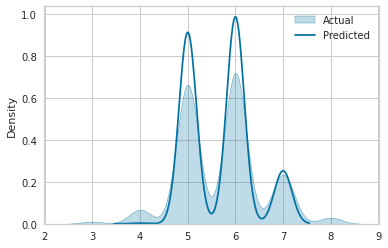

In [50]:
lgb_reg = lgb.LGBMRegressor(max_depth=50)
lgb_reg.fit(X_train_scaled,y_train)
preds = lgb_reg.predict(X_test_scaled)
preds_r = np.round(preds)
print(reg_qdk(y_test,preds_r))
plot_preds_dist(y_test,preds_r)

In [42]:
## predictions from lazy predict
# models

In [53]:

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=reg_qdk)
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

100%|██████████| 42/42 [03:18<00:00,  4.72s/it]


In [54]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken,reg_qdk
Model,,,,,
ExtraTreesRegressor,0.36,0.37,0.67,0.68,0.55
GradientBoostingRegressor,0.35,0.36,0.67,0.51,0.50
RandomForestRegressor,0.34,0.36,0.67,1.51,0.52
LGBMRegressor,0.34,0.35,0.68,0.13,0.54
OrthogonalMatchingPursuitCV,0.31,0.32,0.69,0.04,0.44
HistGradientBoostingRegressor,0.31,0.32,0.69,0.47,0.54
LarsCV,0.31,0.32,0.69,0.07,0.46
LassoLarsCV,0.31,0.32,0.69,0.06,0.46
ElasticNetCV,0.31,0.32,0.69,0.21,0.46


### Submissions

In [59]:
def test_predict(pred_func,cols,scaler,sub_no=1):
    test_df = pd.read_csv(test_pth)
    print(test_df.shape)
    X_scaled = scaler.transform(test_df[cols])
    preds = pred_func(X_scaled)
    test_df['quality'] = preds
    print(test_df.shape)
    subs = test_df[['Id','quality']]
    subs.to_csv('submissions_{}.csv'.format(sub_no),index=False)
    print('Predictions saved to submissions_{}.csv'.format(sub_no))
    return subs

In [60]:
subs = test_predict(lgbm_model.predict,num_cols,scaler,2)

(1372, 12)
(1372, 13)
Predictions saved to submissions_2.csv
